# Time Shift Detection and Fixing

This notebook illustrates the usage of the `fix_time_shifts` function. This algorithm determines if the time stamps provided with the data have "shifted" at any point and then corrects the shift if found. These shifts can often be caused by incorrect handling of daylight savings time, but can come from other sources as well. They are best visualized by viewing the 2D time series data as an image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('..')
from solardatatools.data_transforms import fix_time_shifts, make_2d
from solardatatools.dataio import get_pvdaq_data
from solardatatools.plotting import plot_2d

In [2]:
df1 = get_pvdaq_data(sysid=1199, year=[2015, 2016, 2017], api_key='DEMO_KEY')

In [3]:
D = make_2d(df1, key='dc_power')

Use the providing plotting function to view the 2D representation of the power data. Power output is representated by the color of the pixel. 

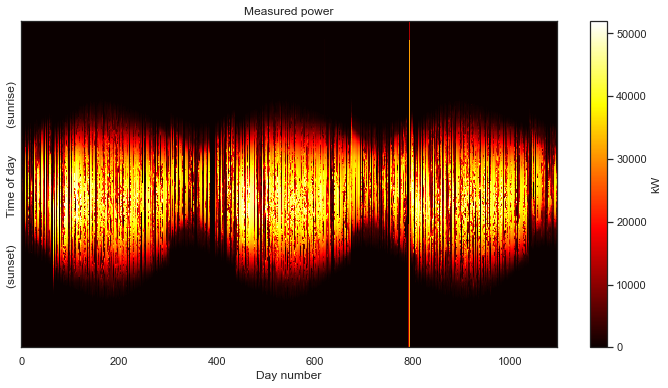

In [4]:
plot_2d(D);

In [5]:
Dfixed, ixs = fix_time_shifts(D, verbose=True, return_ixs=True)

Time shifts found at:  [  51  296  454  675  799 1037]


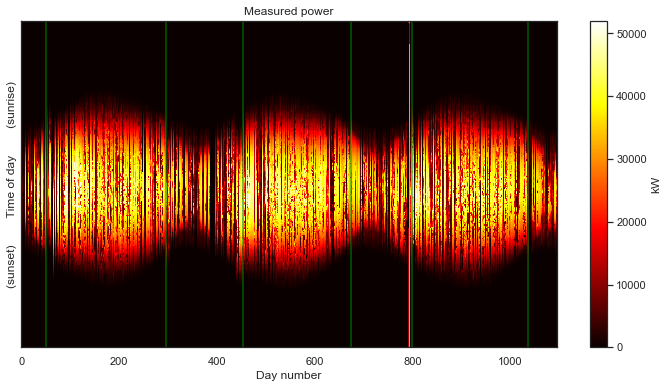

In [6]:
_ = plot_2d(Dfixed)
if len(ixs) > 0:
    for ix in ixs:
        plt.axvline(ix, color='green', alpha=0.7)